# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy import stats as st
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder 
import warnings
warnings.filterwarnings("ignore")
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

*Данные геологоразведки 1-го региона*

In [3]:
df1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df1\
    .corr()\
    .style\
    .background_gradient(cmap='coolwarm')

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [6]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


*Данные геологоразведки 2-го региона*

In [7]:
df2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
df2\
    .corr()\
    .style\
    .background_gradient(cmap='coolwarm')

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [10]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


*Данные геологоразведки 3-го региона*

In [11]:
df3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
df3\
    .corr()\
    .style\
    .background_gradient(cmap='coolwarm')

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


In [14]:
df3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Построим графики зависимостей значений в таблице для наглядного представления о распределнии данных

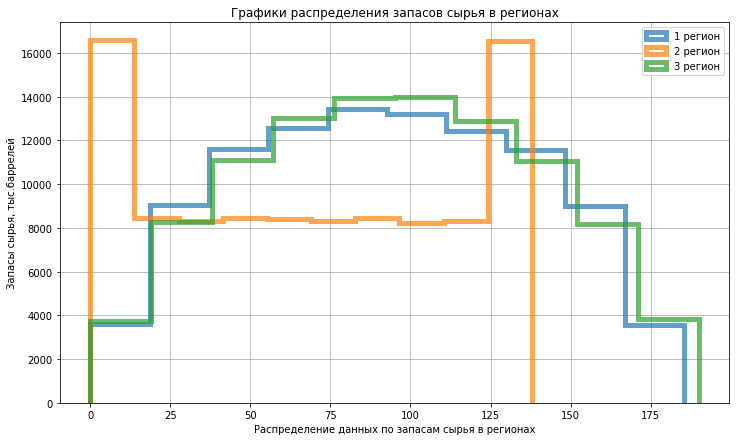

In [15]:
plt.title('Графики распределения запасов сырья в регионах')
ax=df1['product'].plot(kind='hist',figsize=(12,7),grid=True, 
                    legend=True, alpha=0.7, histtype='step', linewidth=5, label='1 регион')
ax1=df2['product'].plot(kind='hist',figsize=(12,7),grid=True, 
                    legend=True, alpha=0.7,histtype='step', linewidth=5, label='2 регион', ax=ax)
df3['product'].plot(kind='hist',figsize=(12,7),grid=True, 
                    legend=True, alpha=0.7,histtype='step', linewidth=5, label='3 регион', ax=ax1)
plt.xlabel('Распределение данных по запасам сырья в регионах')
plt.ylabel('Запасы сырья, тыс.баррелей')
plt.show()

**Вывод:** <br>
Отлично, данные успешно загружены и не требуют дополнительной предобработки, а так же мы теперь имеем визуальное представление о распределении данных по запасам сырья в регионах. На графике отчётливо показана разительно отличающаяся кривая распределения запасов сырья по скважинам 2 региона, какое значение это может сыграть при анализе рентабильности разработки скважин в данном регионе посмотрим далее. Отметим так же, что на данных по корреляции значений второго регоина, мы видим сильную зависимость целевого показателя 'product' от f0, такая зависмость можеть дать нам высокие баллы предсказаний для нашей модели.

## Обучение и проверка модели

Разобьём данные на обучающую и валидационную выборки в соотношении 75:25

In [16]:
target_1=df1['product']
features_1=df1.drop(['product','id'], axis=1)

target_2=df2['product']
features_2=df2.drop(['product','id'], axis=1)

target_3=df3['product']
features_3=df3.drop(['product','id'], axis=1)

*1 регион*

In [17]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, 
                                                                                      target_1, test_size=0.25, random_state=42)
tv=target_valid_1.shape[0]/target_1.shape[0]
tt=target_train_1.shape[0]/target_1.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(tt))
print('Размер валидационной выборки - {:.0%}'.format(tv))

Размер тренировочной выборки- 75%
Размер валидационной выборки - 25%


*2 регион*

In [18]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, 
                                                                                      target_2, test_size=0.25, random_state=42)
tv=target_valid_2.shape[0]/target_2.shape[0]
tt=target_train_2.shape[0]/target_2.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(tt))
print('Размер валидационной выборки - {:.0%}'.format(tv))

Размер тренировочной выборки- 75%
Размер валидационной выборки - 25%


*3 регион*

In [19]:
features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(features_3, 
                                                                                      target_3, test_size=0.25, random_state=42)
tv=target_valid_3.shape[0]/target_3.shape[0]
tt=target_train_3.shape[0]/target_3.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(tt))
print('Размер валидационной выборки - {:.0%}'.format(tv))

Размер тренировочной выборки- 75%
Размер валидационной выборки - 25%


*Обучим модель и сделаем предсказания на валидационной выборке, а так же оценим качество модели техникой RMSEи коэффициентом детерминации R2*

1 регион

In [20]:
model_1=LinearRegression()
model_1.fit(features_train_1,target_train_1)
predict_1=model_1.predict(features_valid_1)
rmse_1 = mean_squared_error(target_valid_1, predict_1)**0.5
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse_1)
print('Коэффициент детерминации: %.2f' % r2_score(target_valid_1, predict_1))

Среднеквадратичная ошибка RMSE: 37.76
Коэффициент детерминации: 0.27


*2 регион*

In [21]:
model_2=LinearRegression()
model_2.fit(features_train_2,target_train_2)
predict_2=model_2.predict(features_valid_2)
rmse_2=mean_squared_error(target_valid_2, predict_2)**0.5
print('Среднеквадратичная ошибка RMSE: %.2f' % rmse_2)
print('Коэффициент детерминации: %.2f' % r2_score(target_valid_2, predict_2))

Среднеквадратичная ошибка RMSE: 0.89
Коэффициент детерминации: 1.00


*3 регион*

In [22]:
model_3=LinearRegression()
model_3.fit(features_train_3,target_train_3)
predict_3=model_3.predict(features_valid_3)
rmse_3 = mean_squared_error(target_valid_3, predict_3)**0.5
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse_3)
print('Коэффициент детерминации: %.2f' % r2_score(target_valid_3, predict_3))

Среднеквадратичная ошибка RMSE: 40.15
Коэффициент детерминации: 0.20


*Сохраним предсказания и правильные ответы на валидационной выборке*

In [23]:
print('1 регион:\n- предсказания модели: "predict_1"\n- правильные ответы: "target_valid_1"')
print()
print('2 регион:\n- предсказания модели: "predict_2"\n- правильные ответы: "target_valid_2"')
print()
print('3 регион:\n- предсказания модели: "predict_3"\n- правильные ответы: "target_valid_3"')

1 регион:
- предсказания модели: "predict_1"
- правильные ответы: "target_valid_1"

2 регион:
- предсказания модели: "predict_2"
- правильные ответы: "target_valid_2"

3 регион:
- предсказания модели: "predict_3"
- правильные ответы: "target_valid_3"


*Напечатаем на экране средний запас предсказанного сырья и RMSE модели*

In [24]:
comparison_tabl = pd.DataFrame(index=['средний запас предсказанного сырья','RMSE модели'], 
                               columns=['1 регион','2 регион','3 регион'])
comparison_tabl['1 регион'] = predict_1.mean(), rmse_1
comparison_tabl['2 регион'] = predict_2.mean(), rmse_2
comparison_tabl['3 регион'] = predict_3.mean(), rmse_3
comparison_tabl

,1 регион,2 регион,3 регион
средний запас предсказанного сырья,92.3988,68.712878,94.771024
RMSE модели,37.7566,0.890280,40.145872


**Вывод:**<br>
Модели обучены и проверены на качество предсказания метрикой RMSE, которая определяет величину среднеквадратичной ошибки в предсказании модели. Исходя из полученных данный в нашей сводной таблицы, можно заметить, что величина RMSE во втором регионе сильно отличается от двух других, это связано с тем, что модель обучилась на практически равных по величине данных, и величина ошибки этой модели не может сильно варьироваться.

## Подготовка к расчёту прибыли

**Все ключевые значения для расчётов сохраним в отдельных переменных**

При разведке региона исследуем 500 точек, из которых с помощью машинного обучения выберем 200 лучших для разработки.<br>
Бюджет на разработку скважин в регионе — 10 млрд рублей.<br>
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс.<br>
рублей, поскольку объём указан в тысячах баррелей.<br>
После оценки рисков оставим лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выберем регион с наибольшей средней прибылью.

In [25]:
BUDGET = 10000000 #Бюджет на разработку скважин в регионе, тыс.руб
INCOME_ONE_PROD = 450 #Доход с каждой единицы продукта, тыс.руб
target_probability_losses = 2.5/100 # вероятность убытков
product_mean_1 = df1['product'].mean()
product_mean_2 = df2['product'].mean()
product_mean_3 = df3['product'].mean()

In [26]:
print('Cредний запас сырья в 1 регионе: %.2f млн.баррелей'%product_mean_1)
print('Cредний запас сырья в 2 регионе: %.2f млн.баррелей'%product_mean_2)
print('Cредний запас сырья в 3 регионе: %.2f млн.баррелей'%product_mean_3)

Cредний запас сырья в 1 регионе: 92.50 млн.баррелей
Cредний запас сырья в 2 регионе: 68.83 млн.баррелей
Cредний запас сырья в 3 регионе: 95.00 млн.баррелей


In [27]:
budg_per_1_point=(BUDGET/200)# тыс.руб
print('Бюджет на разработку одной скважины:', budg_per_1_point/1000,'млн.руб')

Бюджет на разработку одной скважины: 50.0 млн.руб


**Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины**

In [28]:
v_prod=budg_per_1_point/INCOME_ONE_PROD
print('Объём каждой скважины для безубыточной разработки должен составлять не менее: %.2f'%v_prod,'тыс.баррелей')

Объём каждой скважины для безубыточной разработки должен составлять не менее: 111.11 тыс.баррелей


**Сравним полученный объём сырья со средним запасом в каждом регионе**

*1 регион*

In [29]:
df1['profit']=(df1['product']*(INCOME_ONE_PROD)).round(2) # profit, тыс.руб
df1.head()

,id,f0,f1,f2,product,profit
0,txEyH,0.705745,-0.497823,1.221170,105.280062,47376.03
1,2acmU,1.334711,-0.340164,4.365080,73.037750,32866.99
2,409Wp,1.022732,0.151990,1.419926,85.265647,38369.54
3,iJLyR,-0.032172,0.139033,2.978566,168.620776,75879.35
4,Xdl7t,1.988431,0.155413,4.751769,154.036647,69316.49


Определим значение ROI для каждой скважины по отношению к затратам на разработку

In [30]:
df1['roi_%']=((df1['profit']-budg_per_1_point)/budg_per_1_point*100).round(2)
df1.head()

,id,f0,f1,f2,product,profit,roi_%
0,txEyH,0.705745,-0.497823,1.221170,105.280062,47376.03,-5.25
1,2acmU,1.334711,-0.340164,4.365080,73.037750,32866.99,-34.27
2,409Wp,1.022732,0.151990,1.419926,85.265647,38369.54,-23.26
3,iJLyR,-0.032172,0.139033,2.978566,168.620776,75879.35,51.76
4,Xdl7t,1.988431,0.155413,4.751769,154.036647,69316.49,38.63


In [31]:
print('Разница объёма сырья для безубыточной разработки скважины \
      относительно среднего значения по 1 региону составляет: {:.2%}'.format(product_mean_1/v_prod-1))
print('Или {:.2f} тыс.баррелей'.format(v_prod-product_mean_1))

Разница объёма сырья для безубыточной разработки скважины       относительно среднего значения по 1 региону составляет: -16.75%
Или 18.61 тыс.баррелей


*2 регион*

In [32]:
df2['profit']=(df2['product']*INCOME_ONE_PROD).round(2) # profit, тыс.руб
df2.head()

,id,f0,f1,f2,product,profit
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103,1430.60
1,62mP7,14.272088,-3.475083,0.999183,26.953261,12128.97
2,vyE1P,6.263187,-5.948386,5.001160,134.766305,60644.84
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408,62075.43
4,AHL4O,12.702195,-8.147433,5.004363,134.766305,60644.84


Определим значение ROI для каждой скважины по отношению к затратам на разработку

In [33]:
df2['roi_%']=((df2['profit']-budg_per_1_point)/budg_per_1_point*100).round(2)
df2.head()

,id,f0,f1,f2,product,profit,roi_%
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103,1430.60,-97.14
1,62mP7,14.272088,-3.475083,0.999183,26.953261,12128.97,-75.74
2,vyE1P,6.263187,-5.948386,5.001160,134.766305,60644.84,21.29
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408,62075.43,24.15
4,AHL4O,12.702195,-8.147433,5.004363,134.766305,60644.84,21.29


In [34]:
print('Разница объёма сырья для безубыточной разработки скважины \
      относительно среднего значения по 2 региону составляет: {:.2%}'.format(product_mean_2/v_prod-1))
print('Или {:.2f} тыс.баррелей'.format(v_prod-product_mean_2))

Разница объёма сырья для безубыточной разработки скважины       относительно среднего значения по 2 региону составляет: -38.06%
Или 42.29 тыс.баррелей


*3 регион*

In [35]:
df3['profit']=(df3['product']*INCOME_ONE_PROD).round(2) # profit, тыс.руб
df3.head()

,id,f0,f1,f2,product,profit
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673,12491.40
1,WJtFt,0.262778,0.269839,-2.530187,56.069697,25231.36
2,ovLUW,0.194587,0.289035,-5.586433,62.871910,28292.36
3,q6cA6,2.236060,-0.553760,0.930038,114.572842,51557.78
4,WPMUX,-0.515993,1.716266,5.899011,149.600746,67320.34


Определим значение ROI для каждой скважины по отношению к затратам на разработку

In [36]:
df3['roi_%']=((df3['profit']-budg_per_1_point)/budg_per_1_point*100).round(2)
df3.head()

,id,f0,f1,f2,product,profit,roi_%
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673,12491.40,-75.02
1,WJtFt,0.262778,0.269839,-2.530187,56.069697,25231.36,-49.54
2,ovLUW,0.194587,0.289035,-5.586433,62.871910,28292.36,-43.42
3,q6cA6,2.236060,-0.553760,0.930038,114.572842,51557.78,3.12
4,WPMUX,-0.515993,1.716266,5.899011,149.600746,67320.34,34.64


In [37]:
print('Разница объёма сырья для безубыточной разработки скважины \
      относительно среднего значения по 3 региону составляет: {:.2%}'.format(product_mean_3/v_prod-1))
print('Или {:.2f} тыс.баррелей'.format(v_prod-product_mean_3))

Разница объёма сырья для безубыточной разработки скважины       относительно среднего значения по 3 региону составляет: -14.50%
Или 16.11 тыс.баррелей


**Вывод:**<br>
Исходя из полученных данных становится очевидно, что среднее количество запасов сырья по регионам недостаточное даже для окупаемости разработки, требуется выбрать скважины с максимальными запасами

## Расчёт прибыли и рисков 

Выберем скважины с максимальными значениями предсказаний

In [38]:
predict_1

array([101.90101715,  78.21777385, 115.26690103, ...,  82.54439653,
        81.82668931,  93.12106221])

Выполним привязку индексов скважин к предсказаниям модели и отсорируем список по убыванию

In [39]:
probs_sorted_1 = pd.Series(predict_1, index=target_valid_1.index).sort_values(ascending=False)
selected_max_1 = probs_sorted_1[:200]
selected_max_1

46784    176.536104
27658    176.274510
6496     173.249504
65743    172.802708
93716    172.744977
            ...    
14042    146.952653
65925    146.948764
65549    146.947483
9462     146.946515
39838    146.874947
Length: 200, dtype: float64

*Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям*, т.к. затраты на разработку будут пущены только на 200 скважин, просуммируем показатели скважин исходя из максимальных значений предсказаний нашей модели по объёму сырья для получения максимальной прибыли.

In [40]:
selected_max_1_sum = selected_max_1.sum()
print('Суммарный запас сырья в 200 лучших скважинах составит: %.2f тыс.баррелей'%selected_max_1_sum)

Суммарный запас сырья в 200 лучших скважинах составит: 30881.46 тыс.баррелей


Рассчитаем прибыль для полученного объёма сырья

In [41]:
profit_pred_1=(selected_max_1_sum*INCOME_ONE_PROD)-BUDGET
print('Прибыль для полученного объёма сырья составит %.2f тыс.рублей'%profit_pred_1)

Прибыль для полученного объёма сырья составит 3896658.48 тыс.рублей


In [42]:
#Занесём все вычисления в функцию
def profit_for_vp(predict,target,count):
    probs_sorted = pd.Series(predict, index=target.index).sort_values(ascending=False)
    selected_max = probs_sorted[:count].sum()
    profit_pred=(selected_max*INCOME_ONE_PROD)-BUDGET
    print('Суммарный запас сырья в 200 лучших скважинах составит: %.2f тыс.баррелей'%selected_max)
    print('Прибыль для полученного объёма сырья составит %.2f млн.рублей'%(profit_pred/1000))
    return selected_max

In [43]:
#Профит: 1 регион
p_1 = profit_for_vp(predict_1,target_valid_1,200)

Суммарный запас сырья в 200 лучших скважинах составит: 30881.46 тыс.баррелей
Прибыль для полученного объёма сырья составит 3896.66 млн.рублей


In [44]:
#Профит: 2 регион
p_2 = profit_for_vp(predict_2,target_valid_2,200)

Суммарный запас сырья в 200 лучших скважинах составит: 27748.75 тыс.баррелей
Прибыль для полученного объёма сырья составит 2486.94 млн.рублей


In [45]:
#Профит: 3 регион
p_3 = profit_for_vp(predict_3,target_valid_3,200)

Суммарный запас сырья в 200 лучших скважинах составит: 29728.85 тыс.баррелей
Прибыль для полученного объёма сырья составит 3377.98 млн.рублей


**Вывод:**<br>
Отлично, все три региона потенциально прибыльные, для определения наиболее выгодного с точки зрения окупаемости вложений и рисков убытка проведём расчёт вероятности в следующей главе.

## Расчёт прибыли и рисков

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли<br>
Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков

**При́быль**<br>
- положительная разница между суммарными доходами (выручка от реализации товаров и услуг) и затратами на разработку скважин

**Убыток**<br>
- уменьшение материальных и денежных ресурсов в результате превышения расходов над доходами (отрицательная прибыль)

In [46]:
def profit_for_vp2(predict,target,count):
    probs_sorted = pd.Series(predict).sort_values(ascending=False)
    selected_points = target[probs_sorted.index][:count]
    product = selected_points.sum()
    revenue = product * INCOME_ONE_PROD
    return revenue - BUDGET

In [47]:
def bootstap_1000(target,predict):
    values = []
    count = 0
    search_probs = 500
    best_probs = 200
    state = np.random.RandomState(12345)
    predict_e = pd.Series(predict, index=target.index)
    
    for i in tqdm(range(1000)):
        target_subsample = target.sample(search_probs,replace=True, random_state=state)
  
        probs_subsample = predict_e[target_subsample.index]
        values.append(profit_for_vp2(probs_subsample,target_subsample, best_probs))  
    for i in values:
        if i < 0:
            count +=1
            
    values = pd.Series(values)
    mean = values.mean()
    confidence_interval = st.t.interval(0.95, len(values)-1, values.mean(), values.sem())
    
    plt.title('Распределение прибыли')
    values.plot(kind="hist", grid=True, figsize=(8,5))
    plt.xlabel('Прибыль, тыс.руб')
    plt.ylabel('Количество')
    plt.show()
    
    low_95 = values.quantile(0.025)
    high_95 = values.quantile(0.975)
    
    print("Средняя прибыль: {:.2f} млн.руб".format(mean/1000))
    print('С вероятностью 95% прибыль в данном регионе будет составлять от: {:.2f} млн.руб до: {:.2f} млн.руб'.format((low_95/1000),(high_95/1000)))
    print("95%-ый доверительный интервал: от {:.2f} млн.руб до {:.2f} млн.руб". format((confidence_interval[0]/1000),(confidence_interval[1]/1000)))
    print ('Процент вероятности убытка в данном регионе составит {:.1%}'.format(count/1000))
    return  mean, count

  0%|          | 0/1000 [00:00<?, ?it/s]

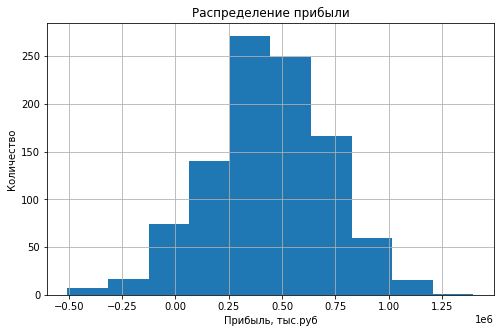

Средняя прибыль: 435.93 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -116.23 млн.руб до: 966.50 млн.руб
95%-ый доверительный интервал: от 418.76 млн.руб до 453.11 млн.руб
Процент вероятности убытка в данном регионе составит 6.1%


In [48]:
#Распределение прибыли 1 регион
r_1 = bootstap_1000(target_valid_1,predict_1)

  0%|          | 0/1000 [00:00<?, ?it/s]

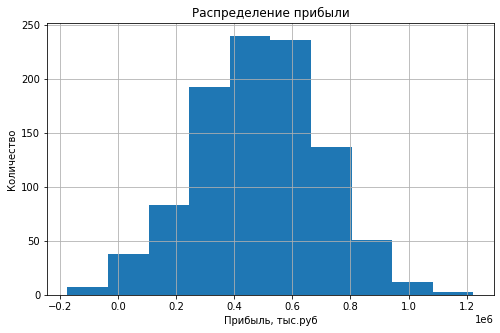

Средняя прибыль: 489.66 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: 55.12 млн.руб до: 905.76 млн.руб
95%-ый доверительный интервал: от 476.23 млн.руб до 503.09 млн.руб
Процент вероятности убытка в данном регионе составит 1.1%


In [49]:
#Распределение прибыли 2 регион
r_2 = bootstap_1000(target_valid_2,predict_2)

  0%|          | 0/1000 [00:00<?, ?it/s]

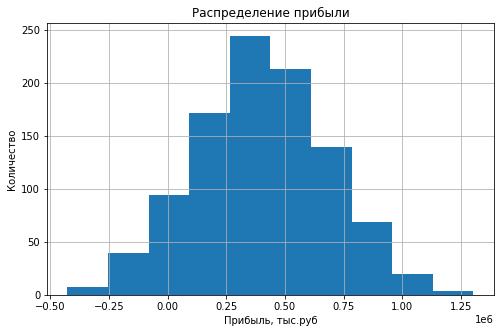

Средняя прибыль: 403.69 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -153.12 млн.руб до: 952.89 млн.руб
95%-ый доверительный интервал: от 386.21 млн.руб до 421.17 млн.руб
Процент вероятности убытка в данном регионе составит 7.1%


In [50]:
#Распределение прибыли 3 регион
r_3 = bootstap_1000(target_valid_3,predict_3)

**Выбор региона**<br>
После оценки рисков оставим лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выберем регион с наибольшей средней прибылью<br>
Сравним среднюю прибыль, вероятность убытка и суммарный запас сырья трёх представленных регионов в таблице

In [51]:
comparison_tabl = pd.DataFrame(index=['Средняя прибыль в регионе, млн.руб',
                                      'Суммарный запас сырья, тыс.баррелей',
                                      'Вероятность убытка, %'], columns=['1 регион','2 регион','3 регион'])
comparison_tabl['1 регион'] = round(r_1[0]/1000,2), round(p_1,2), r_1[-1]/10
comparison_tabl['2 регион'] = round(r_2[0]/1000,2), round(p_2,2), r_2[-1]/10
comparison_tabl['3 регион'] = round(r_3[0]/1000,2), round(p_3,2), r_3[-1]/10
comparison_tabl

,1 регион,2 регион,3 регион
"Средняя прибыль в регионе, млн.руб",435.93,489.66,403.69
"Суммарный запас сырья, тыс.баррелей",30881.46,27748.75,29728.85
"Вероятность убытка, %",6.10,1.10,7.10


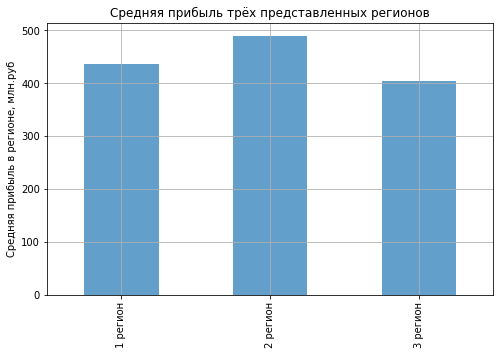

In [52]:
comparison_tabl.astype('float').iloc[0,:].plot(kind="bar", figsize=(8,5), grid=True, alpha=0.7, subplots=True)
plt.title('Средняя прибыль трёх представленных регионов')
plt.ylabel('Средняя прибыль в регионе, млн.руб')
plt.show()

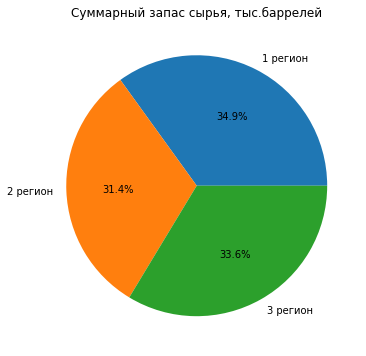

In [53]:
comparison_tabl.astype('float').iloc[1,:].plot(kind='pie', figsize=(6,6),autopct='%1.1f%%', subplots=True)
plt.title('Суммарный запас сырья, тыс.баррелей')
plt.ylabel('')
plt.show()

**Вывод:**<br>
Согласно распределению среднего значения прибыли с региона, самым прибыльным оказался 2 регион, средняя прибыль в этом регионе составит 489.66 млн.рублей. Два других региона не прошли отбор по минимально допустимому порогу убытка в 2,5%. Таким образом не смотря на сравнительно меньшие запасы сырья, по сравнению с другими регионами, средняя доходность со скважин во втором регионе прогнозируется выше других.



## Вывод

Мы исследовали данные по запасам в скважинах трёх регионов, в каждом из которых были данные о запасах сырья по 10 тыс.скважинам. При первом знакомстве с данными мы обнаружили, что средний запас ресурсов по регионам недостаточен даже для окупаемости вложений на разработку и для того, чтобы иметь уверенность в перспективе разработки по регионам, мы обучили модель и выполнили предсказания при помощи *линейной регрессии*, а так же применили технологию *bootstrap* с разделением каждого предсказанного значения прибыли по регионам на 1000 выборок.<br>
<br>
По результату полученных данных мы определили доверительный интревал получения прибыли в 95%, ограничив вероятность убытка величиной менее 2,5%. И на основе этих данных смогли выбрать более перспективный регион для разработки 200 скважин.<br>
<br>
Таким образом не смотря на сравнительно меньшие предсказания запасов сырья в 27.75 млн.баррелей (по сравнению с другими регионами), с величиной вероятного возникновения убытка в 1,1%, но с превышающей средней прибылью в 489.66 млн.рублей мы сдели выбор в сторону разработки 200 скважин во `2 регионе`.

## Дополнительное задание

**Задание:** В качестве дополнительного задания предлагаю оценить риски для процесса с использованием модели и со случайным выбором 200 скважин в каждом регионе, сделать визуализацию распределений прибыли, совместив два графика (с моделью и без) для каждого региона

In [54]:
def profit_for_vp2(predict,target,count):
    probs_sorted = pd.Series(predict).sort_values(ascending=False)
    selected_points = target[probs_sorted.index][:count]
    product = selected_points.sum()
    revenue = product * INCOME_ONE_PROD
    return revenue - BUDGET

def bootstap_1000(target,predict):
    values = []
    search_probs = 500
    best_probs = 200
    state = np.random.RandomState(12345)
    predict_e = pd.Series(predict, index=target.index)
    
    for i in tqdm(range(1000)):
        target_subsample = target.sample(search_probs,replace=True, random_state=state)
  
        probs_subsample = predict_e[target_subsample.index]
        values.append(profit_for_vp2(probs_subsample,target_subsample, best_probs))  

            
    values = pd.Series(values)
    mean = values.mean()
    
    return  values

In [55]:
r_1 = bootstap_1000(target_valid_1,predict_1)
r_2 = bootstap_1000(target_valid_2,predict_2)
r_3 = bootstap_1000(target_valid_3,predict_3)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [56]:
values_1 = pd.DataFrame({
     '1_регион': r_1,
     '2_регион': r_2,
     '3_регион': r_3
})

In [57]:
BUDGET = 10000000 #Бюджет на разработку скважин в регионе, тыс.руб
INCOME_ONE_PROD = 450 #Доход с каждой единицы продукта, тыс.руб
product_1 = df1['product']
product_2 = df2['product']
product_3 = df3['product']

In [58]:
def bootstap_1000(product):
    values = []
    search_probs = 200
    state = np.random.RandomState(12345)
    product_e = pd.Series(product)
    
    for i in tqdm(range(1000)):
        product_subsample = product_e.sample(search_probs,replace=True, random_state=state)
        product_sum = product_subsample.sum() 
        revenue = (product_sum * INCOME_ONE_PROD) - BUDGET
        values.append(revenue)
               
    values = pd.Series(values)
    mean = values.mean()
    
    return  values

In [59]:
r_1_2 = bootstap_1000(product_1)
r_2_2 = bootstap_1000(product_2)
r_3_2 = bootstap_1000(product_3)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [60]:
values_1_nomodel = pd.DataFrame({
     '1_регион': r_1_2,
     '2_регион': r_2_2,
     '3_регион': r_3_2
})

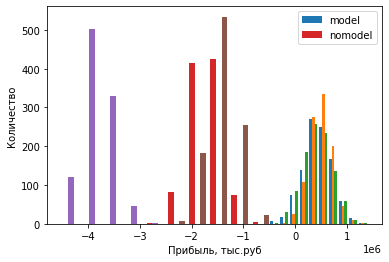

In [61]:
plt.hist(values_1, label='model')
plt.hist(values_1_nomodel, label='nomodel')
plt.xlabel('Прибыль, тыс.руб')
plt.ylabel('Количество')
plt.legend()
plt.show()

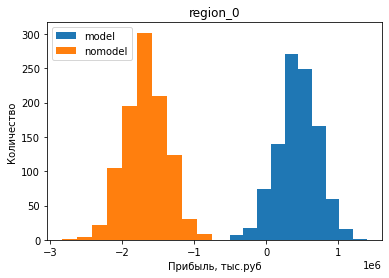

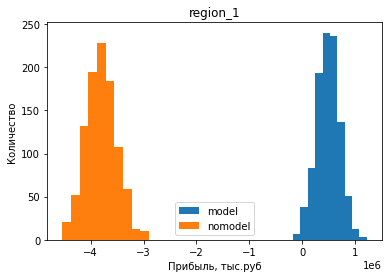

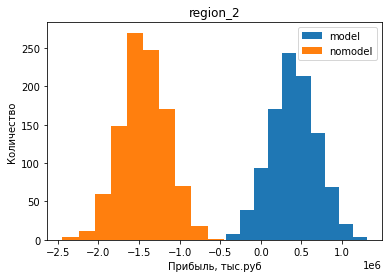

In [63]:
for reg, x, y in zip([0, 1, 2], [r_1, r_2, r_3], [r_1_2, r_2_2, r_3_2]):

    plt.hist(x, label='model')
    plt.hist(y, label='nomodel')
    plt.xlabel('Прибыль, тыс.руб')
    plt.ylabel('Количество')
    plt.legend()
    plt.title(f'region_{reg}')
    plt.show()

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован